In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
import pandas as pd

In [4]:
ati = pd.read_csv('../data/atium.csv', index_col=0)
ati = ati.loc[ati.hrclass == 'MS']
kics = ati.KIC.values
print(f'Working with {len(kics)} stars')

Working with 41 stars


In [5]:
%%time
d = '/home/oliver/PhD/mnt/RDS/malatium/models/'
post_pa = []
for kic in kics:
    try:
        post_pa.append(pd.read_csv(f"{d}{int(kic)}_samples.csv")['P_A'])
    except FileNotFoundError:
        continue
                       

CPU times: user 955 ms, sys: 88.1 ms, total: 1.04 s
Wall time: 1.13 s


In [6]:
bins = np.linspace(0, 1, 100)
hists = [np.histogram(n, bins=bins, density=True)[0] for n in post_pa]

Text(0, 0.5, 'Unnormalised probability')

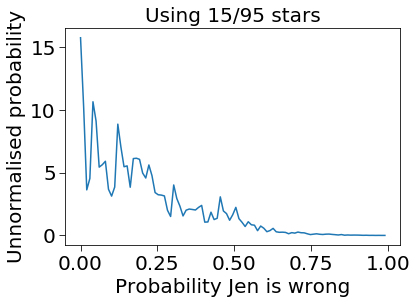

In [7]:
posterior = np.prod(hists, axis=0)
plt.plot(bins[:-1], np.prod(hists, axis=0))
plt.title(f'Using {len(post_pa)}/95 stars')
plt.xlabel('Probability Jen is wrong')
plt.ylabel('Unnormalised probability')

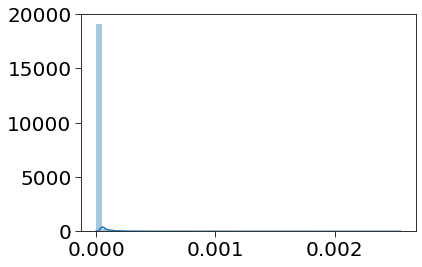

In [9]:
sns.distplot(np.prod(post_pa, axis=0))

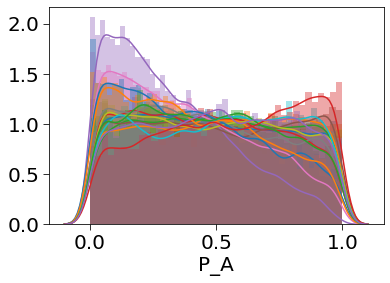

In [8]:
for n in post_pa:
    sns.distplot(n)
